In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load and clean
csv_path = "/content/financials.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=['Symbol', 'Name', 'SEC Filings'])
df = df.dropna()
df = pd.get_dummies(df, columns=['Sector'], drop_first=True)

# Prepare data
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, y_pred)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)

Random Forest RMSE: 43.765756337630506
Random Forest R²: 0.9140092150137861


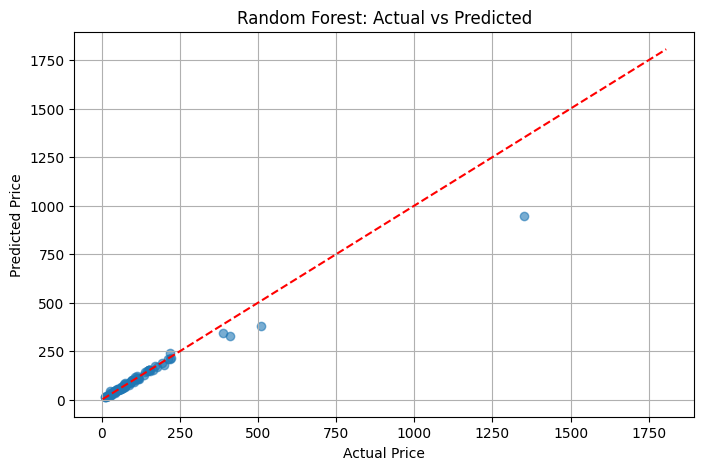

In [4]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()
